<a href="https://colab.research.google.com/github/lucca-fsc/FakeNewsDetection/blob/main/Detec%C3%A7%C3%A3o_de_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Notícias Falsas utilizando Fake Br Corpus


##Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#Carregando o dataset

In [2]:
dados = pd.read_csv('pre-processed.csv')

In [3]:
dados.head()

,index,label,preprocessed_news
0,0,fake,katia abreu diz vai colocar expulsao moldura n...
1,1,fake,ray peita bolsonaro conservador fake entrevist...
2,2,fake,reinaldo azevedo desmascarado policia federal ...
3,3,fake,relatorio assustador bndes mostra dinheiro pub...
4,4,fake,radialista americano fala sobre pt vendem ilus...


In [4]:
dados = dados.drop(columns=['index'])

In [5]:
dados

,label,preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...
...,...,...
7195,true,jornal britanico acao contra lula lava jato se...
7196,true,temer diz acionou pf cade investigar aumentos ...
7197,true,obstaculos politicos temer especialistas ouvid...
7198,true,setembro boa noite aqui estao principais notic...


##Importando bibliotecas para o modelo de IA


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### Vectorizando os dados para se adequar aos modelos de Machine Learning
Foi utilizado o método TF-IDF

In [47]:
X = dados['preprocessed_news']
y = dados['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features=5000)

# X_train = tfidf.fit_transform(X_train)
# X_test = tfidf.fit_transform(X_test)

X = tfidf.fit_transform(X)

In [8]:
print(len(tfidf.vocabulary_))

5000


In [ ]:
tfidf.vocabulary_

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [11]:
print('Total train samples: {}'.format(X_train.shape[0]))
print('Total test samples: {}'.format(X_test.shape[0]))

Total train samples: 5040
Total test samples: 2160


In [ ]:
print(X_train)

### Classificador SVM


In [49]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [50]:
y_pred = clf.predict(X_test)

In [51]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.9592592592592593


In [16]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average = 'macro') * 100

print('Accuracy K-NN from sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score K-NN from sk-learn: {:.2f}%'.format(f1))

Accuracy K-NN from sk-learn: 95.93%
F1 Score K-NN from sk-learn: 95.93%


In [17]:
confusion_matrix(y_test, y_pred)

array([[1042,   43],
       [  45, 1030]])

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fake       0.96      0.96      0.96      1085
        true       0.96      0.96      0.96      1075

    accuracy                           0.96      2160
   macro avg       0.96      0.96      0.96      2160
weighted avg       0.96      0.96      0.96      2160



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


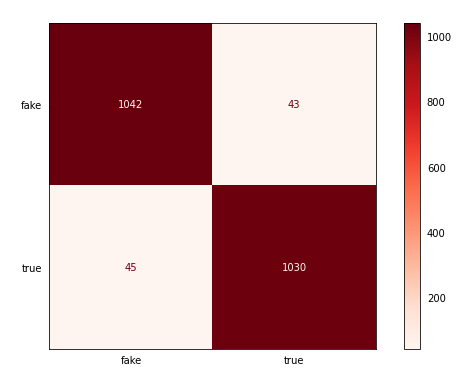

In [19]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Classificador KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors = 5 )
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_predict) * 100
f1 = f1_score(y_test, y_predict, average = 'macro') * 100

print('Accuracy K-NN from sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score K-NN from sk-learn: {:.2f}%'.format(f1))

Accuracy K-NN from sk-learn: 70.97%
F1 Score K-NN from sk-learn: 69.47%


In [23]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 527,  558],
       [  69, 1006]])

In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        fake       0.88      0.49      0.63      1085
        true       0.64      0.94      0.76      1075

    accuracy                           0.71      2160
   macro avg       0.76      0.71      0.69      2160
weighted avg       0.76      0.71      0.69      2160



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


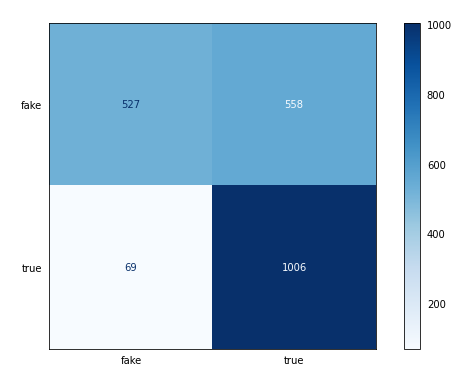

In [25]:
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Classificador Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

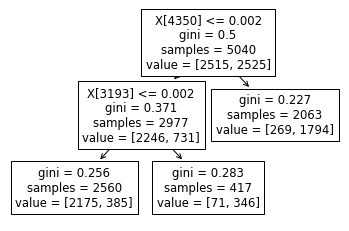

In [27]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X_train, y_train)

tree.plot_tree(clf)
plt.show()

In [28]:
y_predicted = clf.predict(X_test)
print(y_predicted)

['fake' 'fake' 'true' ... 'fake' 'fake' 'fake']


In [29]:
accuracy = accuracy_score(y_test, y_predicted) * 100
f1 = f1_score(y_test, y_predicted, average = 'macro') * 100

print('Accuracy Decision Tree from Sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score Decision Tree from Sk-learn: {:.2f}%'.format(f1))

Accuracy Decision Tree from Sk-learn: 85.79%
F1 Score Decision Tree from Sk-learn: 85.79%


In [30]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

        fake       0.86      0.86      0.86      1085
        true       0.86      0.86      0.86      1075

    accuracy                           0.86      2160
   macro avg       0.86      0.86      0.86      2160
weighted avg       0.86      0.86      0.86      2160



In [31]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[933, 152],
       [155, 920]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


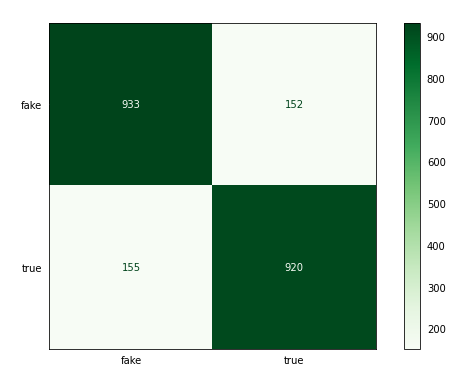

In [32]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Greens)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

In [33]:
dados.head()

,label,preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...


In [34]:
x = 'eua coreia sul iniciam manobras aereas conjuntas treinamento aereo conjunto apos coreia norte lancar semana passada missil intercontinental exercicios so vao terminar sexta estados unidos coreia sul iniciaram nesta grande exercicio aereo conjunto poucos dias lancamento missil intercontinental operacao considerada pyongyang provocacao total exercicio cinco dias batizado vigilant ace envolve avioes incluindo cacas raptor mobiliza dezenas milhares soldados durante fim semana jornal estatal rodong denunciou manobras provocacao aberta todos niveis contra coreia norte poderia resultar guerra nuclear qualquer momento afirmou publicacao editorial belicistas americanos marionete fariam bem recordar exercicio militar dirigido contra coreia norte sera tao estupido ato precipita autodestruicao completou ministerio relacoes exteriores acusou sabado governo donald trump querer guerra nuclear qualquer preco simulacao aerea exercicio anual comecou cinco dias teste missil balistico intercontinental icbm supostamente capaz atingir territorio estados unidos momento grande tensao domingo influente senador republicano lindsey graham citou fantasma guerra preventiva acontecer teste nuclear subterraneo sera necessario estar preparado resposta estados unidos advertiu congressista entrevista canal cbs palavras graham complemento declaracoes sabado assessor seguranca nacional donald trump general hr mcmaster durante forum sobre defesa afirmou probabilidade guerra coreia norte aumenta cada dia isolado empobrecido regime realizou seis testes nucleares desde recente setembro coreia norte lancou passada novo tipo missil hwasong capacidade transportar ogiva pesada extragrande pode atingir todo territorio continental estados unidos segundo lider kim teste pais alcancou objetivo estado nuclear pleno direito analistas consideraram recente teste mostra avanco pyongyang tecnologia militar tambem destacaram provavel teste pais utilizou ogiva leve ogiva nuclear pesada missil dificuldades chegar longe tambem demonstraram ceticismo respeito capacidade coreia norte preservar sobrevivencia ogivas reentrada atmosfera programa militar rendeu muitas condenacoes internacionais pyongyang avancou desde chegada poder kim'

vec = tfidf.transform([x])


In [35]:
clf.predict(vec)

array(['true'], dtype=object)

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC

names = [
         'Nearest-Neighbors',
         'Linear SVM',
         'RBF SVM',
         'Poly SVM',
         'Decision Tree',
         'Random Forest',
         'Neural Net',
         'Adaboost',
]

classifiers = [
               KNeighborsClassifier(3),
               SVC(kernel = 'linear'),
               SVC(gamma = 2, C = 10),
               SVC(kernel = 'poly'),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1),
               MLPClassifier(alpha=1, max_iter=1000),
               AdaBoostClassifier(),
]

for name, clf in zip(names, classifiers):
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(name + ' - Accuracy:' + str(score))

Nearest-Neighbors - Accuracy:0.7212962962962963
Linear SVM - Accuracy:0.961574074074074
RBF SVM - Accuracy:0.9518518518518518
Poly SVM - Accuracy:0.8949074074074074
Decision Tree - Accuracy:0.8925925925925926
Random Forest - Accuracy:0.7578703703703704
Neural Net - Accuracy:0.9527777777777777
Adaboost - Accuracy:0.9481481481481482


In [37]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear')
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

[0.95833333 0.96527778 0.96666667 0.95972222 0.95069444]


In [38]:
print(scores.mean())

0.960138888888889


### Vectorizando apenas o conjunto de Treino

In [60]:
X = dados['preprocessed_news']
y = dados['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features=500)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.fit_transform(X_test)

# X = tfidf.fit_transform(X)


In [61]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [62]:
y_pred = clf.predict(X_test)

In [63]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.8532407407407407
